# Collect Data

we will use only 10 sentences to create word vectors

In [1]:
corpus = ['king is a strong man',
          'queen is a wise woman',
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong',
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']

# Remove stop words

In order for efficiency of creating word vector, we will remove commonly used words

In [2]:
def remove_stop_words(corpus):
    stop_words = ['is','a','will','be']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    return results

In [3]:
corpus = remove_stop_words(corpus)

In [4]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)
        
words = set(words)

In [5]:
words

{'boy',
 'girl',
 'king',
 'man',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

# Data Generation

we will generate label for each word using skip gram.

In [6]:
word2int = {}

for i, word in enumerate(words):
    word2int[word] = i
    
sentences = []

for sentence in corpus:
        sentences.append(sentence.split())
        
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) :  min(idx + WINDOW_SIZE, len(sentence)) + 1]:
            if neighbor != word:
                data.append([word, neighbor])

In [7]:
import pandas as pd
for text in corpus:
    print(text)
    
df = pd.DataFrame(data, columns = ['input','label'])

king strong man
queen wise woman
boy young man
girl young woman
prince young king
princess young queen
man strong
woman pretty
prince boy king
princess girl queen


In [8]:
df.head(10)

,input,label
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king
5,man,strong
6,queen,wise
7,queen,woman
8,wise,queen
9,wise,woman


In [9]:
df.shape

(52, 2)

In [10]:
word2int

{'boy': 3,
 'girl': 8,
 'king': 0,
 'man': 11,
 'pretty': 7,
 'prince': 10,
 'princess': 6,
 'queen': 4,
 'strong': 9,
 'wise': 2,
 'woman': 1,
 'young': 5}

# Define Tensorflow Graph

In [11]:
import tensorflow as tf
import numpy as np

ONE_HOT_DIM = len(words)

# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

In [12]:
X = [] # input word
Y = [] # target word

for x,y in zip(df['input'],df['label']):
    X.append(to_one_hot_encoding(word2int[x]))
    Y.append(to_one_hot_encoding(word2int[y]))
    
X_train = np.asarray(X)
Y_train = np.asarray(Y)

In [13]:
# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 2

# hidden layer : which represent word_vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1]))
hidden_layer = tf.add(tf.matmul(x,W1),b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add(tf.matmul(hidden_layer, W2),b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# training operation
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

In [14]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

iteration = 20000
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbot word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 3000 == 0:
        print("iteration " + str(i) + " loss is : ", sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

('iteration 0 loss is : ', 3.1487403)
('iteration 3000 loss is : ', 1.8464769)
('iteration 6000 loss is : ', 1.7927011)
('iteration 9000 loss is : ', 1.7652396)
('iteration 12000 loss is : ', 1.7488399)
('iteration 15000 loss is : ', 1.739287)
('iteration 18000 loss is : ', 1.7321696)


In [15]:
vectors = sess.run(W1 + b1)
print vectors

[[ 1.0121982  -0.3489219 ]
 [-0.1804887   0.3255782 ]
 [ 1.622217    5.600309  ]
 [ 3.999598    0.11754179]
 [-0.02945137  0.9900197 ]
 [ 0.33148277  0.209108  ]
 [ 3.454319    4.8571353 ]
 [-0.38624752  5.1030865 ]
 [ 0.95051587  2.3371456 ]
 [ 6.8969917  -0.5365356 ]
 [ 3.203917   -0.8013514 ]
 [ 1.0820031  -0.6692046 ]]


# Word vector in table

In [38]:
vectors = [
[ 0.09515536166874677 , 0.3515729804338882 ],
[ 0.3282390587244385 , 0.42061604587501067 ],
[ 0.13373564952702438 , 0.7436190353027423 ],
[ 0.9992854191406983 , 0.6978573421562125 ],
[ 0.004296308301416226 , 0.34462256937228686 ],
[ 0.309835732298106 , 0.10075934496639223 ],
[ 0.5919211480178131 , 0.37758935224847284 ],
[ 0.6868367111684777 , 0.7515784172109704 ],
[ 0.23740346401720439 , 0.2194628335421064 ],
[ 0.04334503484406189 , 0.48561028280535884 ],
[ 0.6075692412483361 , 0.3969482895473772 ],
[ 0.07965988089106325 , 0.877713309313532 ],
]

words = ["young", "prince", "princess", "girl", "man", "queen", "wise", "woman", "pretty", "strong", "boy", "king"]
print words

w2v_df = pd.DataFrame(vectors, columns = ['x1','x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word','x1','x2']]
w2v_df

['young', 'prince', 'princess', 'girl', 'man', 'queen', 'wise', 'woman', 'pretty', 'strong', 'boy', 'king']


,word,x1,x2
0,young,0.095155,0.351573
1,prince,0.328239,0.420616
2,princess,0.133736,0.743619
3,girl,0.999285,0.697857
4,man,0.004296,0.344623
5,queen,0.309836,0.100759
6,wise,0.591921,0.377589
7,woman,0.686837,0.751578
8,pretty,0.237403,0.219463
9,strong,0.043345,0.485610


# Word vector in 2d Chart

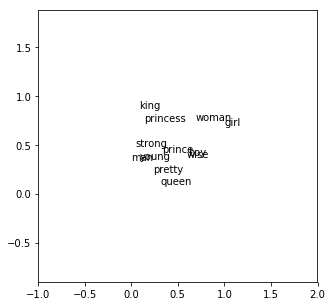

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'],w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING

plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (5,5)

plt.show()